<a href="https://colab.research.google.com/github/sachatur13/100daysofML/blob/master/Pneumonia_prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Training and testing data path
train_data = '/content/drive/My Drive/Colab Notebooks/Data/chest_xray/train/'
test_data = '/content/drive/My Drive/Colab Notebooks/Data/chest_xray/test/'

In [ ]:
image_path = os.listdir(train_data+'NORMAL')[1]

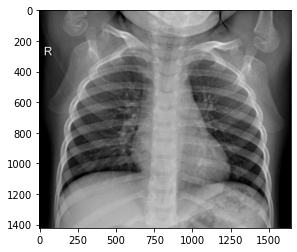

In [ ]:
## Image file example
normal_lungs = train_data+'NORMAL/'+image_path
plt.imshow(cv2.imread(normal_lungs,flags=0),cmap='gray')


In [ ]:
image = cv2.imread(normal_lungs,flags=0)
print(image.shape)

(1422, 1642)


In [ ]:
X_new = imread(normal_lungs,format = 'jpeg').reshape((imread(normal_lungs,format = 'jpeg').shape[0],imread(normal_lungs,format = 'jpeg').shape[1],1))

In [ ]:
X_new.shape

(1422, 1642, 1)

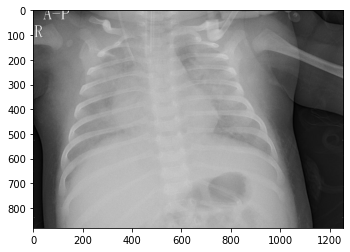

In [ ]:
image_path = os.listdir(train_data+'PNEUMONIA')[1]
infected = train_data+'PNEUMONIA/'+image_path
plt.imshow(cv2.imread(infected),cmap = 'gray')

In [ ]:
## Average Image size 
dimension_1 = []
dimension_2 = []

for image in os.listdir(test_data+'NORMAL'):
  img = cv2.imread(test_data+'NORMAL/'+image)
  d1,d2,col = img.shape
  dimension_1.append(d1)
  dimension_2.append(d2)

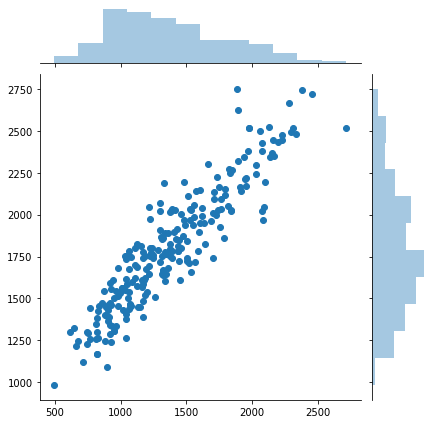

In [ ]:
sns.jointplot(dimension_1,dimension_2)

In [ ]:
## Average image size
np.mean(dimension_1)

1369.0897435897436

In [ ]:
## resizing images to be in the same size
img_shape =(1400,1400,1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range = 20,width_shift_range = 0.1,
                               height_shift_range = 0.1,shear_range = 0.1,
                               zoom_range = 0.1,horizontal_flip = True,
                               fill_mode = 'nearest')

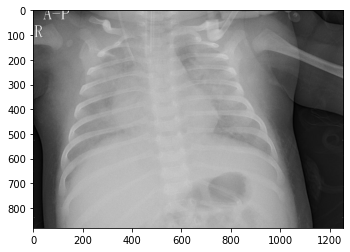

In [ ]:
plt.imshow(cv2.imread(infected),cmap = 'gray')

In [ ]:
infect = cv2.imread(infected)

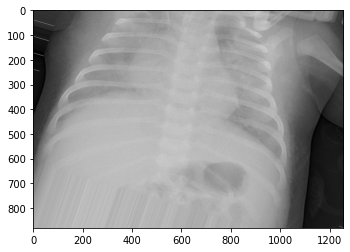

In [ ]:
plt.imshow(image_gen.random_transform(infect))

In [ ]:
image_gen.flow_from_directory(train_data)

Found 5216 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_data)

Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 48,kernel_size = (4,4),padding='same',
                input_shape = img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 128,kernel_size = (4,4),padding='same',
                input_shape = img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 192,kernel_size = (4,4),padding='same',
                input_shape = img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 192,kernel_size = (4,4),padding='same',
                input_shape = img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 192,kernel_size = (4,4),padding='same',
                input_shape = img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1400, 1400, 48)    816       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 700, 700, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 700, 700, 128)     98432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 350, 350, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 350, 350, 192)     393408    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 175, 175, 192)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 175, 175, 192)    

In [ ]:
early = EarlyStopping(monitor = 'val_loss',patience = 2)
batch_size = 8

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_data,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_data,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle = False)

Found 624 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=10,
                             validation_data = test_image_gen,
                              callbacks = [early]
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
652/652 [==============================] - ETA: 0s - loss: 2.3847 - accuracy: 0.7699

In [ ]:
print(model.history.history)

{'loss': [1.4132641553878784, 0.49530529975891113, 0.34403133392333984, 0.3203209340572357, 0.350763738155365, 0.32637572288513184], 'accuracy': [0.7772239446640015, 0.8149923086166382, 0.8562116622924805, 0.8640720844268799, 0.855636477470398, 0.8646472096443176], 'val_loss': [0.7991951704025269, 0.6443347334861755, 0.6159870028495789, 0.4818677604198456, 0.7306448817253113, 0.6997882723808289], 'val_accuracy': [0.629807710647583, 0.7580128312110901, 0.7804487347602844, 0.8301281929016113, 0.8060897588729858, 0.8253205418586731]}


In [ ]:
metric = pd.DataFrame(model.history.history)

In [ ]:
metric

,loss,accuracy,val_loss,val_accuracy
0,1.413264,0.777224,0.799195,0.629808
1,0.495305,0.814992,0.644335,0.758013
2,0.344031,0.856212,0.615987,0.780449
3,0.320321,0.864072,0.481868,0.830128
4,0.350764,0.855636,0.730645,0.806090
5,0.326376,0.864647,0.699788,0.825321


In [ ]:
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
predictions = pred>0.5

In [ ]:
predictions

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       234
           1       0.81      0.91      0.86       390

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624

